In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

# Strategy returns of holding each stock separately

In [4]:
from dataset import get_prices, get_log_returns

# Load returns
df_returns = get_log_returns(get_prices())
tickers = df_returns.columns

Chosen tickers: ['LKOH', 'SBERP', 'VTBR', 'SBER', 'MOEX', 'HYDR', 'TATN', 'MGNT', 'NVTK', 'MTLR']
Length before dropping NaNs: 2603
Length after dropping NaNs: 2478


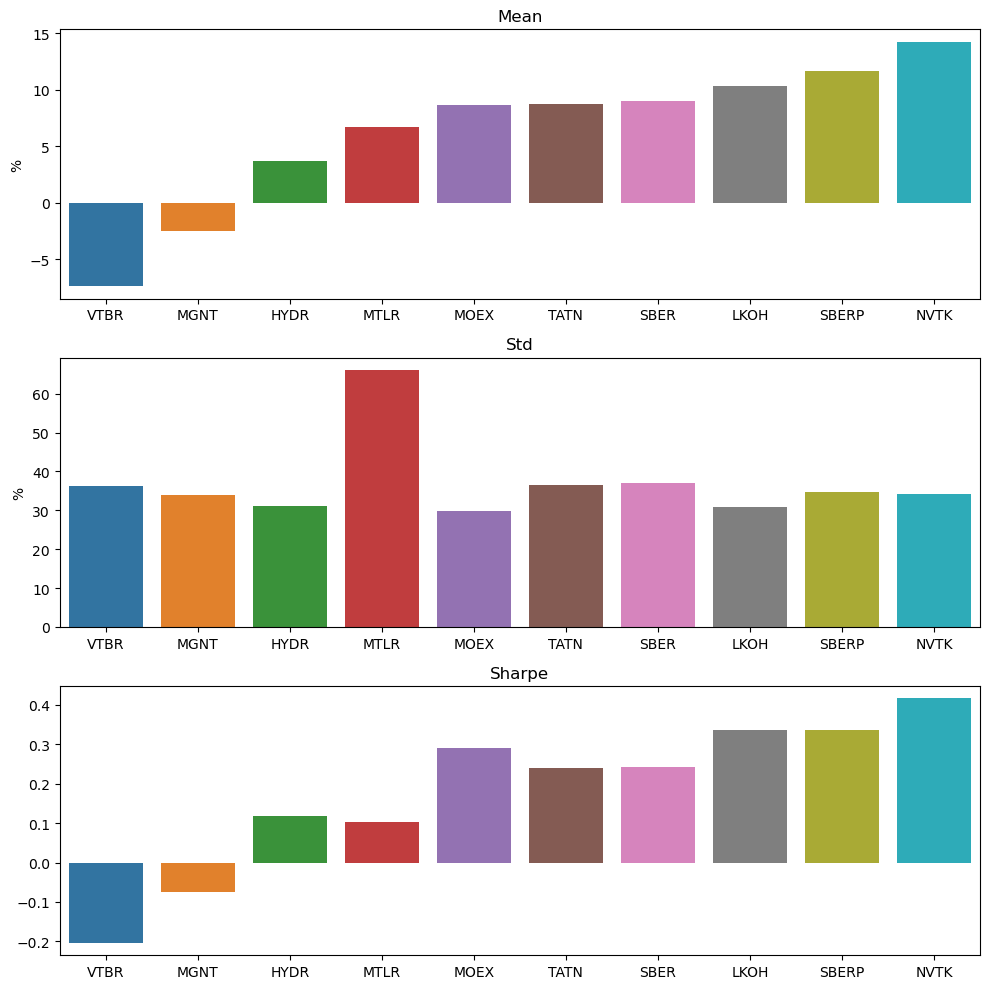

In [27]:
from portfolio import plot_tickers_performance

plot_tickers_performance(df_returns)

# Returns correlation matrix

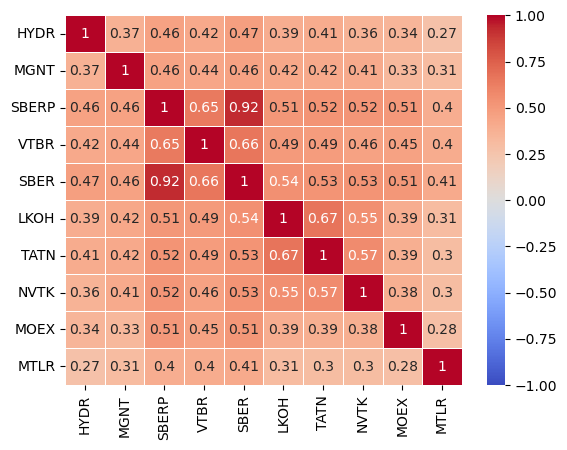

In [7]:
from correlations import plot_correlation_matrix

sorted_tickers = plot_correlation_matrix(df_returns.corr())

# Equal portfolio statistics

Annual Return (mean ± std): 6.3% ± 26.2%
Sharpe: 0.24

Annual Mean Return 95.0% confidence interval: 6.30%±16.37%


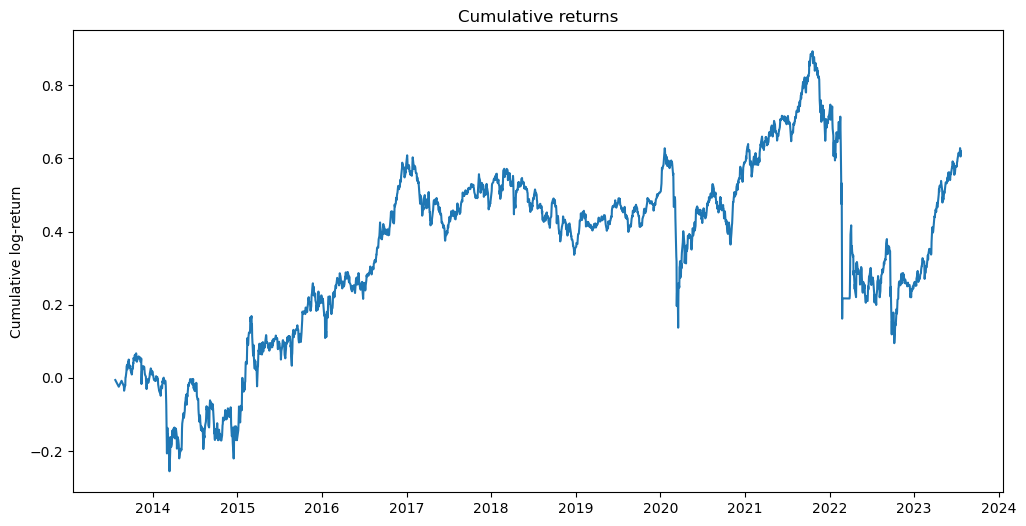

In [30]:
from portfolio import print_statistics, get_equal_portfolio
from signals import get_equal_portfolio

print_statistics(get_equal_portfolio(df_returns.columns), df_returns)

In [68]:
from signals import get_momentum_signal

df_momentum_signal = get_momentum_signal(df_returns, days_for_signal=pd.Timedelta(days=365), n_min_observations=200)

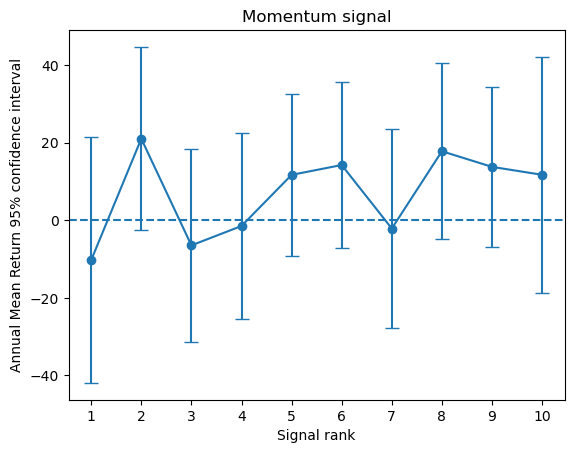

In [85]:
from signals import plot_signal_ranks

plot_signal_ranks(df_momentum_signal, df_returns, 'Momentum signal')

Annual Return (mean ± std): 9.0% ± 27.6%
Sharpe: 0.33

Annual Mean Return 95% confidence interval: 9.05%±17.99%


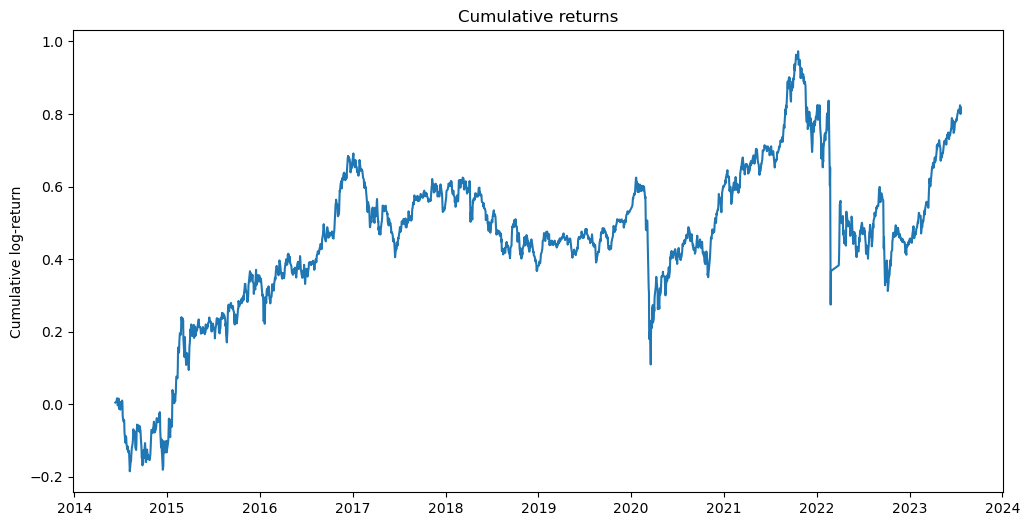

In [89]:
from signals import get_portfolio_from_signal

df_momentum_weights = get_portfolio_from_signal(df_momentum_signal)
print_statistics(df_momentum_weights, df_returns)